# Multiple Linear Regression with california_housing Dataset

The goal of this exercise is to perform Multiple Linear Regression on the california_housing dataset from sklearn.datasets to predict median house value based on features like population, average income, and proximity to employment centers.

In [1]:
# import required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_california_housing


## Load California housing dataset

In [2]:
# Load the California housing dataset
california_dataset = fetch_california_housing()

In [3]:
type(california_dataset)

sklearn.utils._bunch.Bunch

In [4]:
california_dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

looks like dictonary, print the keys

In [5]:
california_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [7]:
print(california_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [8]:
california_dataset.target_names

['MedHouseVal']

In [9]:
california_dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [10]:
california_dataset.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [11]:
# target features
california_dataset.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

### Create dataframe from the data

In [14]:
dataset = pd.DataFrame(california_dataset.data, columns=california_dataset.feature_names)
dataset['Price'] = california_dataset.target

In [16]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Exploratory data analysis (EDA) 

In [18]:
# Check data types and non-null counts
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [19]:
# Summary statistics
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [20]:
# Check for missing values
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

No missing values

In [21]:
# Correlation matrix
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


**Observations:**
- No missing values are present.
- All columns are float64 type, suitable for regression.
- MedInc (Median Income) has the strongest positive correlation (0.688) with Target (Price). 
    - Inidcates higher median income is associated with higher housing prices.
- AveRooms (Average Rooms) shows a moderate positive correlation (0.152) with Price.
- HouseAge (House Age) has a weak positive correlation (0.106) with Price.
- Latitude and Longitude show weaker correlations with Target (Price).


### Visualization 

#### Correlation Heatmap

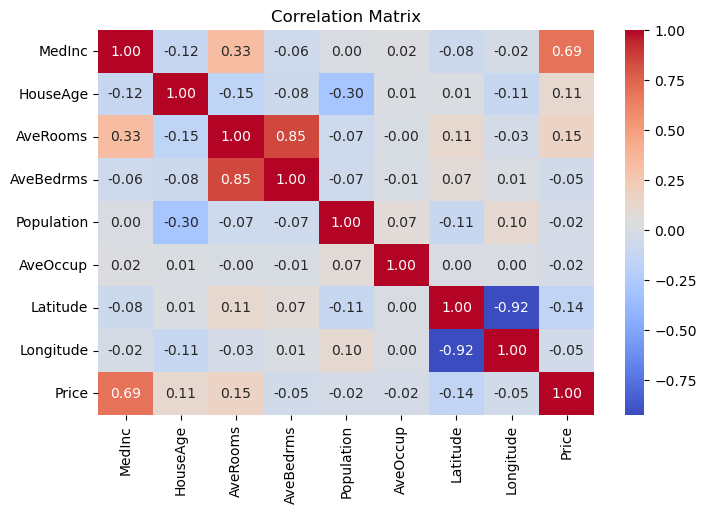

In [31]:
# Visualize the correlation matrix using a heatmap.
plt.figure(figsize=(8, 5))
sns.heatmap(dataset.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

**Observations:**
- AveRooms and AveBedrms are highly positively correlated (0.848), it means they provide overlapping information. This creates multicollinearity (highly correlated, meaning they provide similar or overlapping information). This can confuse the model, make coefficients unstable, and reduce prediction reliability.

- Latitude and Longitude have a strong negative correlation (-0.925).

- Population, AveOccup, Longitude, and AveBedrms show very weak correlations with Price (close to 0). These variables may not significantly impact the target variable directly.


#### Distribution of the Target Variable

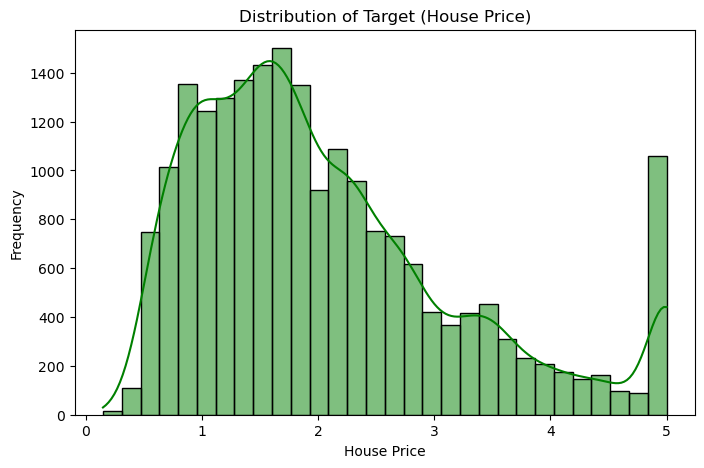

In [33]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(dataset['Price'], kde=True, bins=30, color='g')
plt.title("Distribution of Target (House Price)")
plt.xlabel("House Price")
plt.ylabel("Frequency")
plt.show()

**Observation:**
- House Prices has a right-skewed distribution means most of the data is on the lower side, but there are a few extremely high values that stretch the data out to the right.

Eg: Most houses might be cheaper, but a few very expensive ones pull the average price higher.

This can cause problems for machine learning models, which often expect the data to be more balanced. To fix this, we can transform the data.

#### Pairwise Relationships

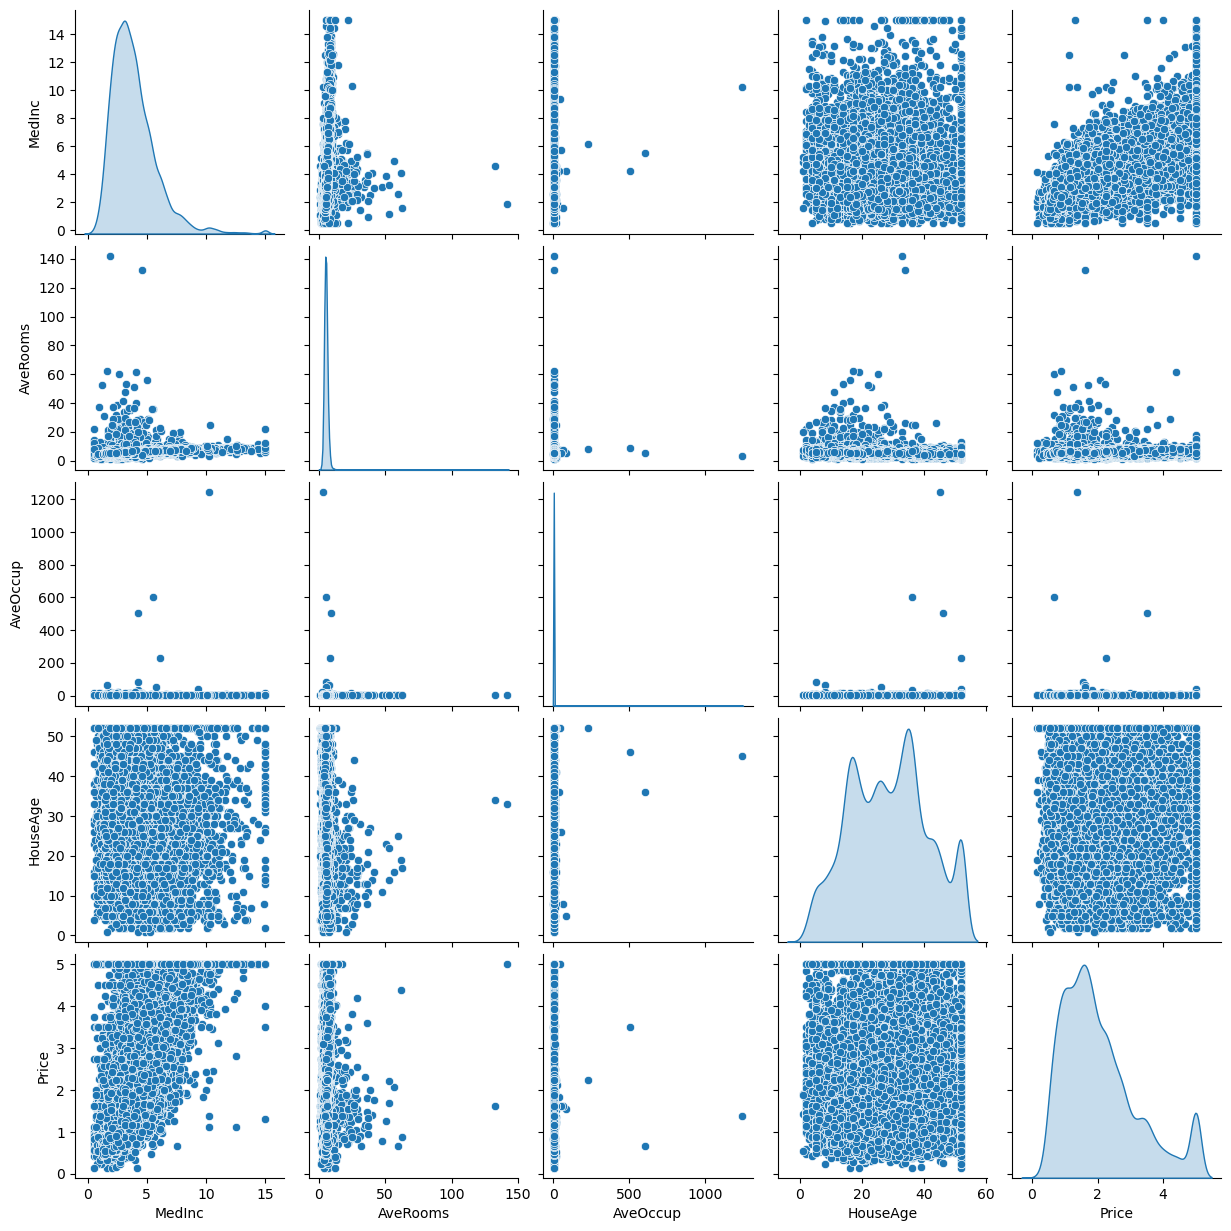

In [32]:
# using Pairplot visualize relationships between features and the target variable.
sns.pairplot(dataset[['MedInc', 'AveRooms', 'AveOccup', 'HouseAge', 'Price']], diag_kind='kde')
plt.show()

**Observation:**
- Weak correlations between MedianHouseValue and other features like AveOccup.

#### Scatter Plots

Visualize relationships between key features and the target variable.

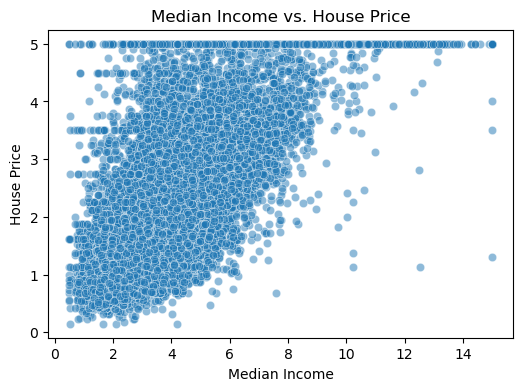

In [34]:
# Median Income vs. House Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=dataset['MedInc'], y=dataset['Price'], alpha=0.5)
plt.title('Median Income vs. House Price')
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.show()

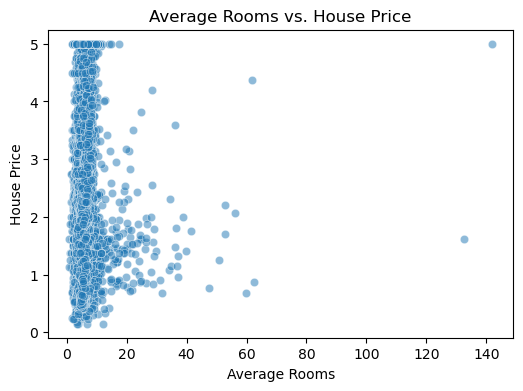

In [35]:
# Average Rooms vs. House Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=dataset['AveRooms'], y=dataset['Price'], alpha=0.5)
plt.title('Average Rooms vs. House Price')
plt.xlabel('Average Rooms')
plt.ylabel('House Price')
plt.show()

#### Box Plots
Check for outliers in key features.

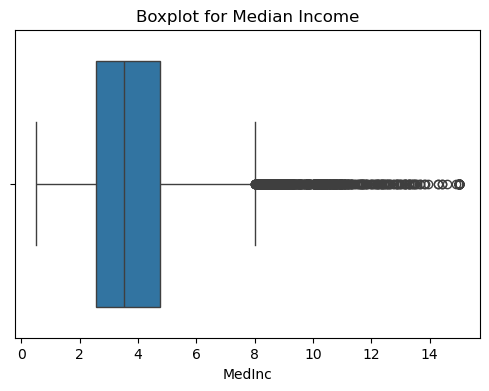

In [36]:
# Boxplot for Median Income
plt.figure(figsize=(6, 4))
sns.boxplot(x=dataset['MedInc'])
plt.title('Boxplot for Median Income')
plt.show()

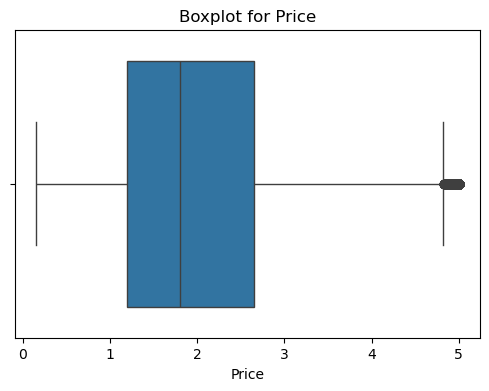

In [37]:
# Boxplot for Price
plt.figure(figsize=(6, 4))
sns.boxplot(x=dataset['Price'])
plt.title('Boxplot for Price')
plt.show()

**Observations:**
- Detect potential outliers in MedInc and AveRooms that might influence the regression model.